   active_cust  income  ...  technical_issues_per_month  Speed_test_result
0            0    1586  ...                           4                 85
1            0    1581  ...                           4                 85
2            0    1594  ...                           4                 85
3            0    1594  ...                           4                 85
4            1    1609  ...                           4                 85

[5 rows x 10 columns]

 ['active_cust', 'income', 'expenditure', 'months_on_network', 'Num_complaints', 'number_plan_changes', 'relocated', 'monthly_bill', 'technical_issues_per_month', 'Speed_test_result']
Below are the column details 
 

active_cust - categorical(1- Active, 0- Attrited) 
 income - Monthly Income of the customer (numeric) 
 expenditure - Expense of a user (numeric) 
 months_on_network - Duration in months, the customer has been a customer of Airfone (numeric) 
 Num_complaints - Number of complaints so far lodged by the custom

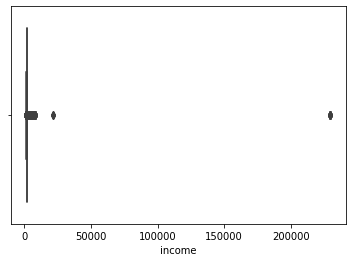

In [43]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import csv
plt.rc("font", size=10)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from imblearn.over_sampling import SMOTE


data= pd.read_csv('/content/drive/My Drive/Ticket Data/Airfone_Attrition_Data_file_1.csv')
print(data.head())
print('\n',list(data.columns))
print('Below are the column details \n \n')
print("active_cust - categorical(1- Active, 0- Attrited) \n income - Monthly Income of the customer (numeric) \n expenditure - Expense of a user (numeric) \n months_on_network - Duration in months, the customer has been a customer of Airfone (numeric) \n Num_complaints - Number of complaints so far lodged by the customer (numeric) \n number_plan_changes - How many times the customer changed the plan (numeric) \n  relocated - categorical(This is relocated indicator, 0- Not relocated, 1 - Relocated) \n monthly_bill - Monthly bill for the customer (numeric) \n technical_issues_per_month - Technical issues per month leading to disruption or slow in speed (numeric) \n Speed_test_result - Internet speed of Airfone (numeric)")

ActiveCustPerc = (len(data[data['active_cust']==1])/len(data['active_cust']))*100
print("\n Percent of Active customers stands at {}% \n".format(ActiveCustPerc))


print('The Data grouped by Mean is below {} \n \n'.format(data.groupby('active_cust').mean()))
print('The Data grouped by Num_complaints is below {} \n \n'.format(data.groupby('Num_complaints').mean()))
print('The Data grouped by number_plan_changes is below {} \n \n'.format(data.groupby('number_plan_changes').mean()))
print('The Data grouped by relocated is below {} \n \n'.format(data.groupby('relocated').mean()))

q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print(data.corr())
iqr = q3-q1
iqrdata = ((data < (q1 - 3 * iqr)) | (data > (q3 + 3 * iqr)))
print('The IQR data for the file uploaded is \n {} \n'.format(iqr))
data1 = data
print('The description of the column is displayed below \n {} \n Based on the info, we see that the months on netwok is in negative which we are correcting with IQR method \n'.format(data['months_on_network'].describe()))
sns.boxplot(x=data['income'])
data['income'] = np.where(data['income'] > data['income'].quantile(0.98), data['income'].quantile(0.50) , data['income'])
print('The outliers are corrected with the median of the column(income) and the updated information for the column is below:\n',data['income'].describe())

The outliers are corrected with the median of the column(Speed_test_result) and the updated information for the column is below:
 count    100000.000000
mean         81.225600
std           3.752224
min          72.000000
25%          78.000000
50%          81.000000
75%          85.000000
max          87.000000
Name: Speed_test_result, dtype: float64


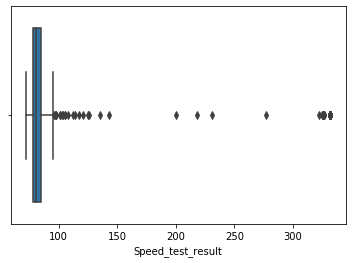

In [44]:
sns.boxplot(x=data['Speed_test_result'])
data['Speed_test_result'] = np.where(data['Speed_test_result'] > data['Speed_test_result'].quantile(0.98), data['Speed_test_result'].quantile(0.50) , data['Speed_test_result'])
print('The outliers are corrected with the median of the column(Speed_test_result) and the updated information for the column is below:\n',data['Speed_test_result'].describe())

95th percentile on months_on_network is  85.0
5th percentile on months_on_network is  33.0
Median of months_on_network is  56.0
The outliers are corrected with the median of the column(months_on_network) and the updated information for the column is below:
 count    100000.000000
mean         57.657770
std          14.848701
min          26.000000
25%          47.000000
50%          56.000000
75%          69.000000
max          91.000000
Name: months_on_network, dtype: float64
Since the income & expenditure are highly correlated, dropping expenditure
The relevant attributes of building a model is predicted value is ['active_cust'] and the independent variables are Index(['income', 'months_on_network', 'Num_complaints', 'number_plan_changes',
       'relocated', 'monthly_bill', 'technical_issues_per_month',
       'Speed_test_result'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


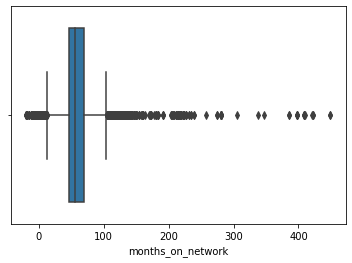

In [45]:
sns.boxplot(x=data['months_on_network'])
print('95th percentile on months_on_network is ',data['months_on_network'].quantile(0.95))
print('5th percentile on months_on_network is ',data['months_on_network'].quantile(0.05))
print('Median of months_on_network is ',data['months_on_network'].quantile(0.50))
data['months_on_network'] = np.where(data['months_on_network'] < 26, 56 , data['months_on_network'])
data['months_on_network'] = np.where(data['months_on_network'] > data['months_on_network'].quantile(0.98), data['months_on_network'].quantile(0.50) , data['months_on_network'])
print('The outliers are corrected with the median of the column(months_on_network) and the updated information for the column is below:\n',data['months_on_network'].describe())
print('Since the income & expenditure are highly correlated, dropping expenditure')

x = data.drop(['active_cust','expenditure'],axis=1)
y = data[['active_cust']]

print('The relevant attributes of building a model is predicted value is {} and the independent variables are {}'.format(list(y.columns),x.columns))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

oversample = SMOTE(random_state = 0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
osam_data_x,osam_data_y=oversample.fit_sample(x_train, y_train)
collistx = list(x.columns)
collisty = list(y.columns)

osam_data_x = pd.DataFrame(data=osam_data_x, columns=collistx)
osam_data_y = pd.DataFrame(data=osam_data_y, columns=collisty)

logregress = LogisticRegression()

In [46]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit(method='newton')
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.497807
         Iterations 7
                              Results: Logit
Model:                  Logit               Pseudo R-squared:    0.269     
Dependent Variable:     active_cust         AIC:                 99577.4642
Date:                   2020-03-04 07:52    BIC:                 99653.5676
No. Observations:       100000              Log-Likelihood:      -49781.   
Df Model:               7                   LL-Null:             -68074.   
Df Residuals:           99992               LLR p-value:         0.0000    
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         7.0000                                             
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
income           

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression classifier on test set: 74.66%
[[ 7313  3341]
 [ 2995 11351]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70     10654
           1       0.77      0.79      0.78     14346

    accuracy                           0.75     25000
   macro avg       0.74      0.74      0.74     25000
weighted avg       0.75      0.75      0.75     25000



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


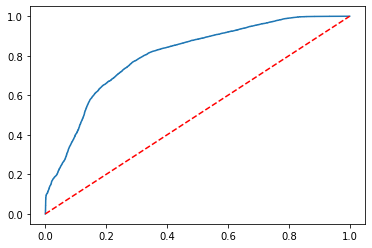

In [47]:
logregress.fit(x_train, y_train)
y_pred = logregress.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(logregress.score(x_test, y_test)*100))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logregress.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logregress.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

In [0]:
resultsummary = pd.DataFrame(result.summary2().tables[1])

type(resultsummary['z'][0])
resultsummary['absZ'] = resultsummary.apply(lambda x : abs(x['z']),axis = 1)

In [49]:
resultsummary1 = resultsummary[['absZ']]
resultsummary1.sort_values(by=['absZ'],ascending= False)

,absZ
Speed_test_result,80.630361
relocated,78.905753
technical_issues_per_month,58.689094
income,46.518221
Num_complaints,41.777863
number_plan_changes,26.530114
months_on_network,16.508265
monthly_bill,15.656636
